# **Task 4 : Email Spam Detection**

In [21]:
pip install matplotlib seaborn wordcloud


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from tabulate import tabulate
from wordcloud import WordCloud

In [3]:
data = pd.read_csv('spam.csv', encoding='latin1')


# **Data Exploration**

In [4]:
# Display the first few rows of the dataset
print("\nSample Data:")
print(data.head())


Sample Data:
        v1                                                 v2 Unnamed: 2  \
0  notspam  Go until jurong point, crazy.. Available only ...        NaN   
1  notspam                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3  notspam  U dun say so early hor... U c already then say...        NaN   
4  notspam  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [5]:
# Display basic information about the dataset
print("Data Overview:")
print(data.info())

Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None


# **Visualizations**

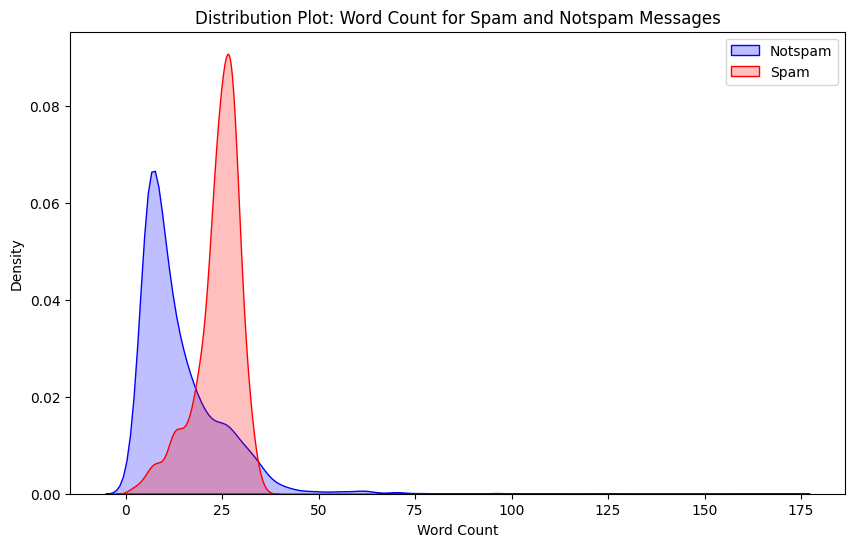

In [6]:
# Distribution Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data[data['v1'] == 'notspam']['v2'].apply(lambda x: len(x.split())), color='blue', label='Notspam', fill=True)
sns.kdeplot(data[data['v1'] == 'spam']['v2'].apply(lambda x: len(x.split())), color='red', label='Spam', fill=True)
plt.title('Distribution Plot: Word Count for Spam and Notspam Messages')
plt.xlabel('Word Count')
plt.ylabel('Density')
plt.legend()
plt.show()

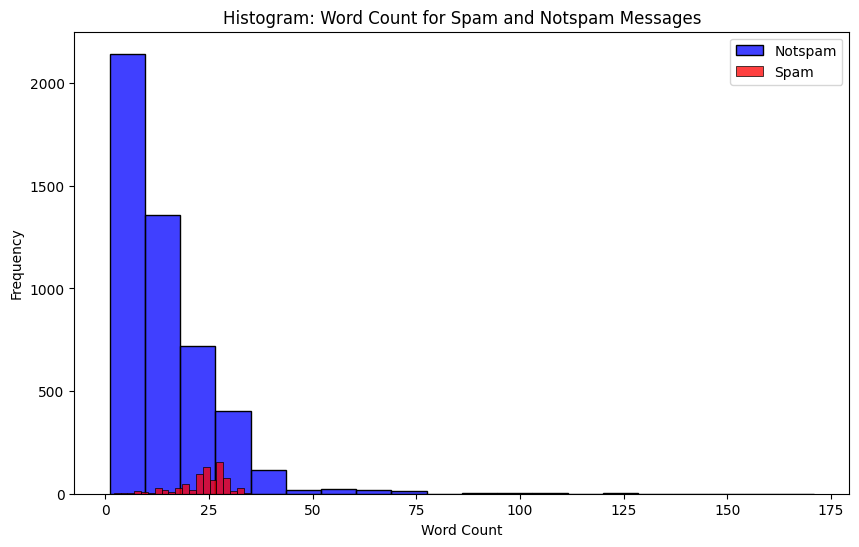

In [7]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data[data['v1'] == 'notspam']['v2'].apply(lambda x: len(x.split())), color='blue', bins=20, label='Notspam')
sns.histplot(data[data['v1'] == 'spam']['v2'].apply(lambda x: len(x.split())), color='red', bins=20, label='Spam')
plt.title('Histogram: Word Count for Spam and Notspam Messages')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()

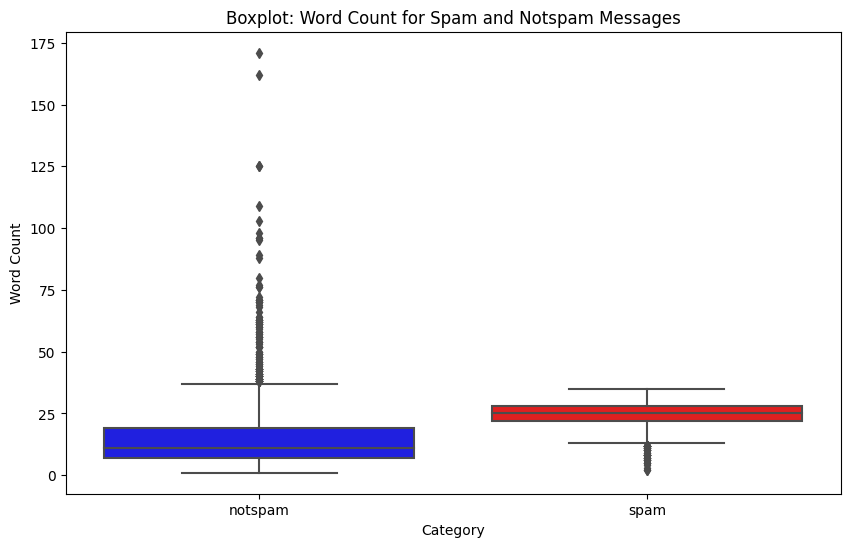

In [8]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='v1', y=data['v2'].apply(lambda x: len(x.split())), data=data, palette={'notspam': 'blue', 'spam': 'red'})
plt.title('Boxplot: Word Count for Spam and Notspam Messages')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()

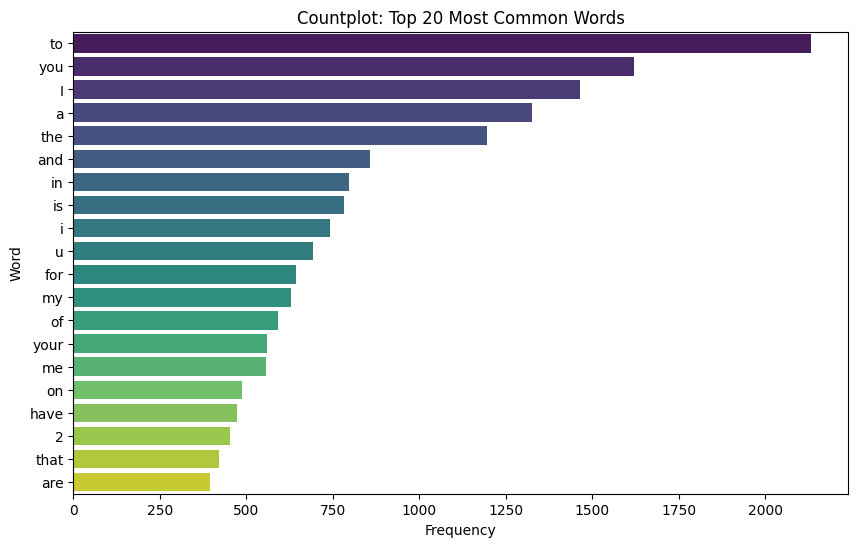

In [9]:
# Countplot for the most common words
plt.figure(figsize=(10, 6))
common_words = pd.Series(' '.join(data['v2']).split()).value_counts()[:20]
sns.barplot(x=common_words.values, y=common_words.index, palette='viridis')
plt.title('Countplot: Top 20 Most Common Words')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

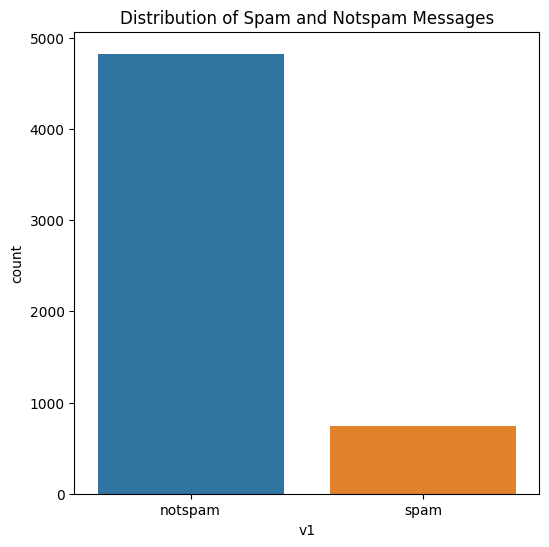

In [10]:
# Distribution of spam and notspam messages
plt.figure(figsize=(6, 6))
sns.countplot(x='v1', data=data)
plt.title('Distribution of Spam and Notspam Messages')
plt.show()

In [11]:
# Display statistics about the length of messages
print("\nMessage Length Statistics:")
print(data.groupby('v1')['v2'].apply(lambda x: x.apply(lambda y: len(y.split())).mean()))



Message Length Statistics:
v1
notspam    14.200622
spam       23.851406
Name: v2, dtype: float64


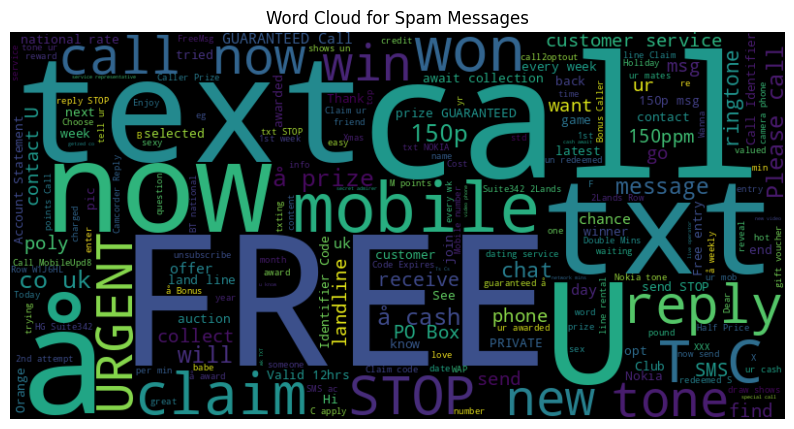

In [12]:
# Most common words in spam messages
spam_messages = ' '.join(data[data['v1'] == 'spam']['v2'])
spam_wordcloud = WordCloud(width=800, height=400, max_words=200).generate(spam_messages)
plt.figure(figsize=(10, 6))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Messages')
plt.show()

# **Text Preprocessing and Feature Extraction**

In [13]:
# Text preprocessing and feature extraction
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.85)
X = tfidf_vectorizer.fit_transform(data['v2'])
y = data['v1'].map({'notspam': 0, 'spam': 1})

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Model Training and Evaluation**


In [15]:
# Train multiple classifiers
classifiers = {
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Logistic Regression': LogisticRegression()
}

results = {}


In [16]:
# Train, evaluate, and store results
for clf_name, clf in classifiers.items():
    pipeline = make_pipeline(clf)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[clf_name] = accuracy


In [17]:
# Display model accuracies in tabulate
print("\nModel Accuracies:")
model_accuracies = [[model, acc] for model, acc in results.items()]
print(tabulate(model_accuracies, headers=["Model", "Accuracy"], tablefmt="grid"))



Model Accuracies:
+------------------------+------------+
| Model                  |   Accuracy |
+========================+============+
| Naive Bayes            |   0.96861  |
+------------------------+------------+
| Random Forest          |   0.976682 |
+------------------------+------------+
| Support Vector Machine |   0.972197 |
+------------------------+------------+
| Logistic Regression    |   0.944395 |
+------------------------+------------+


In [18]:
# Identify the best classifier
best_classifier_name = max(results, key=results.get)
best_classifier = classifiers[best_classifier_name]


In [19]:
# Train the best classifier on the full dataset
X_full = tfidf_vectorizer.transform(data['v2'])
best_classifier.fit(X_full, y)

RandomForestClassifier()

# **Model Evaluation**

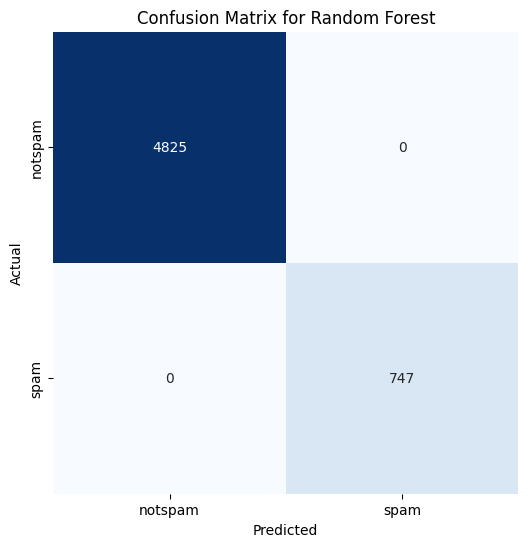

In [20]:
# Confusion matrix
y_pred_full = best_classifier.predict(X_full)
conf_matrix = confusion_matrix(y, y_pred_full)

# Display the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['notspam', 'spam'], yticklabels=['notspam', 'spam'])
plt.title(f'Confusion Matrix for {best_classifier_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()